In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
@njit
def walk(steps, dim):

  N = np.random.random((steps+1, dim)) - 0.5
  N[0, :] = 0

  for s in range(1, steps+1):
    for d in range(dim):
      N[s, d] += N[s-1, d]

  return N

In [3]:
def plot_walks(w):

  fig = plt.figure(figsize = (10,6))
  ax = fig.add_subplot(111)

  for d in range(len(w[0])):
    ax.plot(w[:,d])

  ax.set_ylabel('delta')
  ax.set_xlabel('t')
  plt.show()

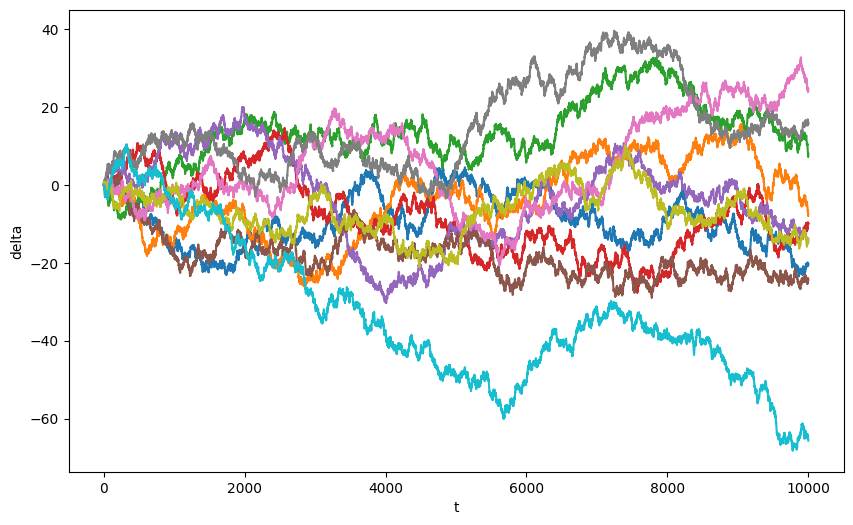

In [4]:
plot_walks(walk(10000, 10))

We can see that the difference between two random walks can build up over time, even if the average result of a step is zero. It should be noted that this differences are still close to zero, considering that the explorable space by the 10.000th step is between -5.000 and 5.0000

In [5]:
def plot_2d_walks(w, steps=None):

  fig = plt.figure(figsize = (10,6))
  ax = fig.add_subplot(111)

  for walker in range(0, len(w[0]), 2):
    ax.plot(w[:,walker+0],w[:,walker+1])

  ax.set_ylabel('y')
  ax.set_xlabel('x')

  if steps:
    ax.set_title(str(steps) + ' steps')

  plt.show()

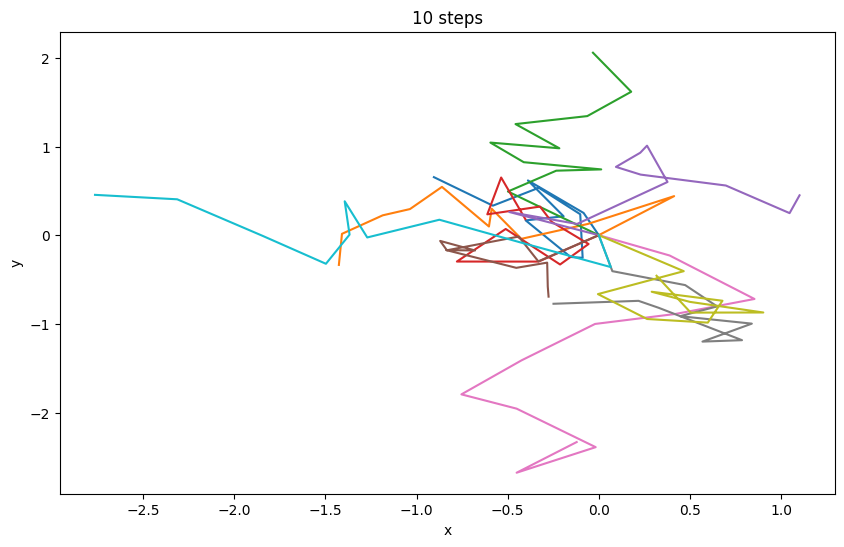

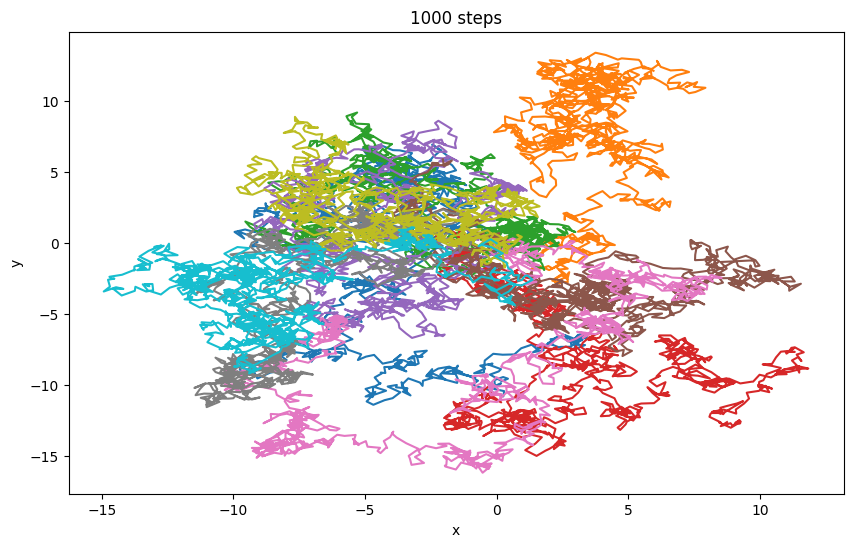

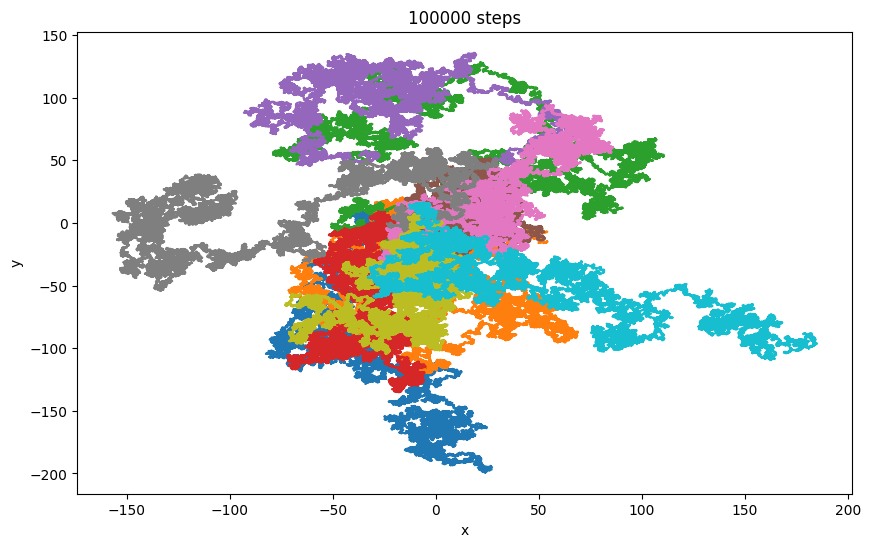

In [6]:
for steps in [10, 1000, 100000]:
  plot_2d_walks(walk(steps, 20), steps)

We can see that the deviation from the origin appear to have a correlation with the number of steps taken. Namely the deviation grows at the square root of number of steps.

In [7]:
@njit
def final_2d_position(w):
  return w[-1,0], w[-1,1]

In [8]:
def plot_final_coordenates(samples, steps=[1000], samples_per_step=False):

  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(111)

  colors = ['red', 'green', 'blue', 'purple', 'grey']

  for i in range(len(steps)):
    # we are iterating backwards, as it is more likely that
    # later walks are longer
    i = -i-1

    sample = samples
    if samples_per_step:
      sample = sample * steps[i]

    X = np.ndarray((sample))
    Y = np.ndarray((sample))

    for j in range(sample):
      X[j], Y[j] = final_2d_position(walk(steps[i], 2))

    ax.scatter(X,Y, marker='x', color=colors[i%len(steps)])

  ax.set_ylabel('y')
  ax.set_xlabel('x')
  ax.set_title(", ".join(map(str, steps)) + ' steps')

  plt.show()

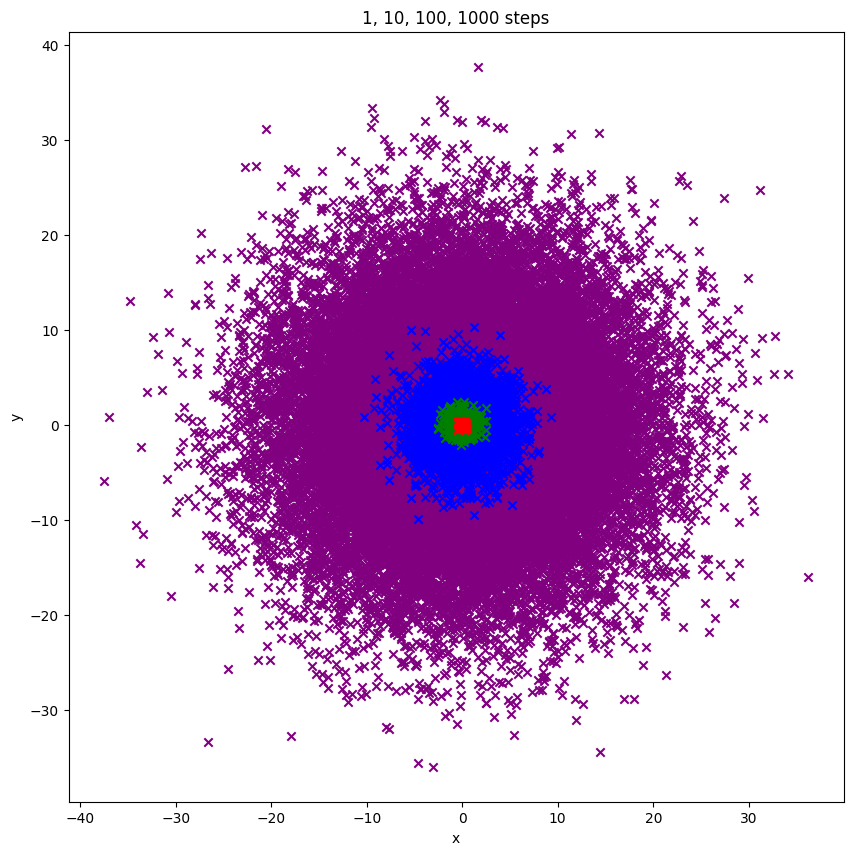

In [9]:
plot_final_coordenates(32, [10**0, 10**1, 10**2, 10**3], samples_per_step=True)

Two things became evident. Firstly, as we can see by the red format (single step walk), the limit of the walk space is always a square (or cube, etc), assuming a walk were each direction is independent and equal in all orientations.

Secondly, as there is a tendency towards the center (average step being remaning still), we see the density of walks increasing the closer you are of the center, which creates a distribution that looks like blurred circles as we add dots.

In [10]:
def final_positions(W):
  return W[-1, :]

In [11]:
def plot_statistic(sample, size):

  W = walk(size, sample)
  dist = final_positions(W)

  # a = sqrt( <x²> )
  # <x2> = integral(x² p(x) dx)
  # p(x) = 1 para x in [-1/2, 1/2]
  # <x²> = integral[-1/2, 1/2](x² dx)
  # <x²> = (1/2)³/3 - (-1/2)³/3 = 1/12
  # a = 1/sqrt(12)

  a = 12 ** (1/2)
  a = 1/a
  s = a * (size ** (1/2))
  est = -3*s

  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(111)

  ax.hist(dist, bins=50)
  ax.plot([-est, -est], [0, sample/25], 'k')
  ax.plot([ est, est], [0, sample/25], 'k')
  ax.set_title(str(size) + ' steps')

  plt.show()

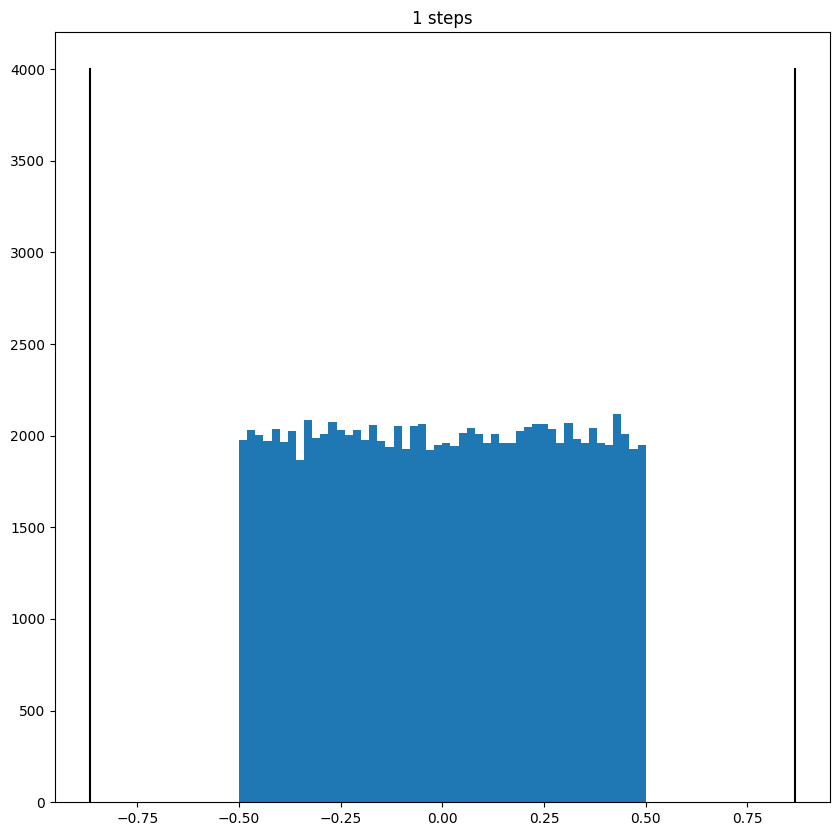

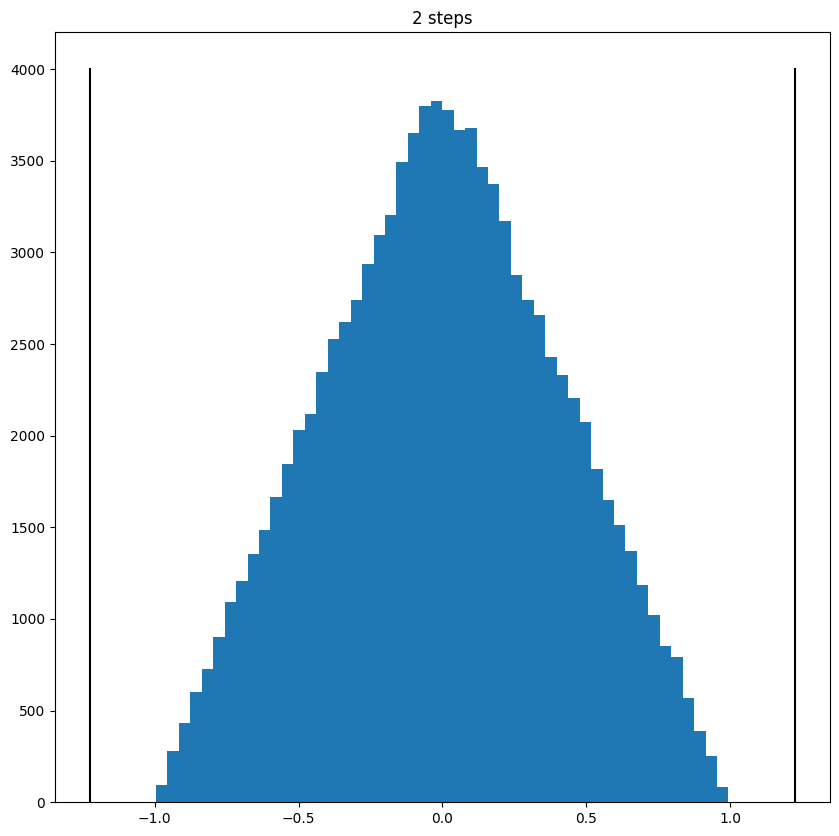

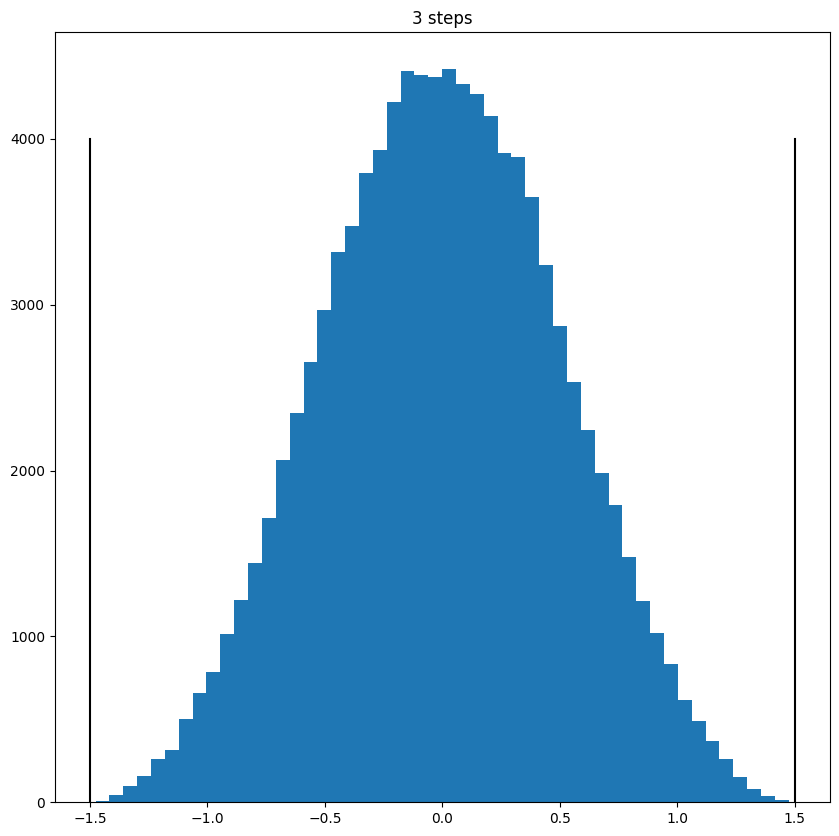

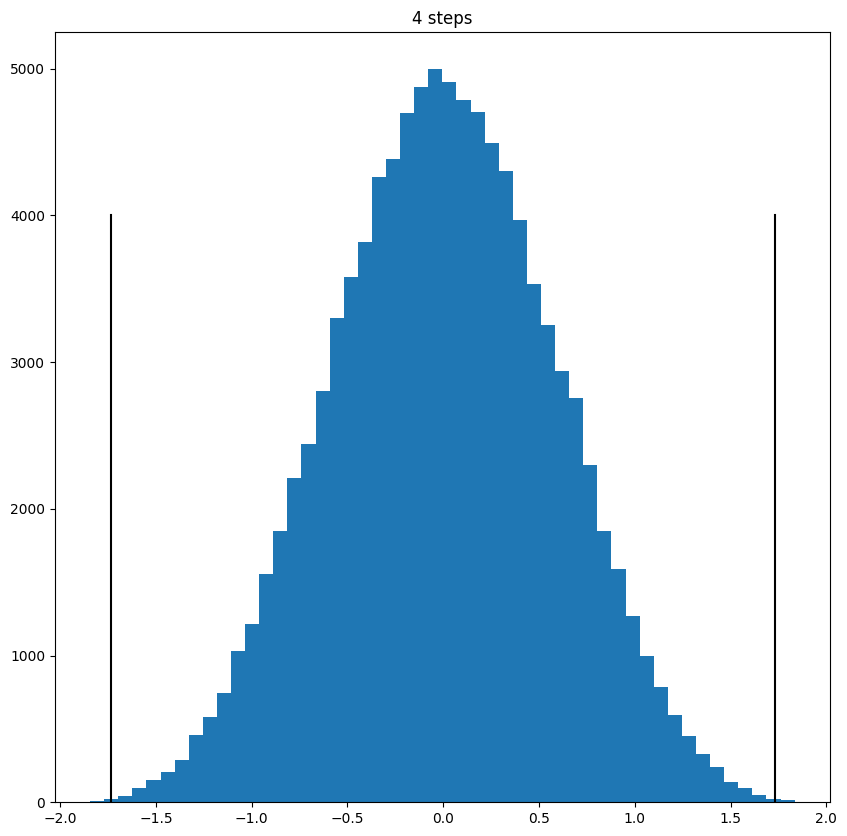

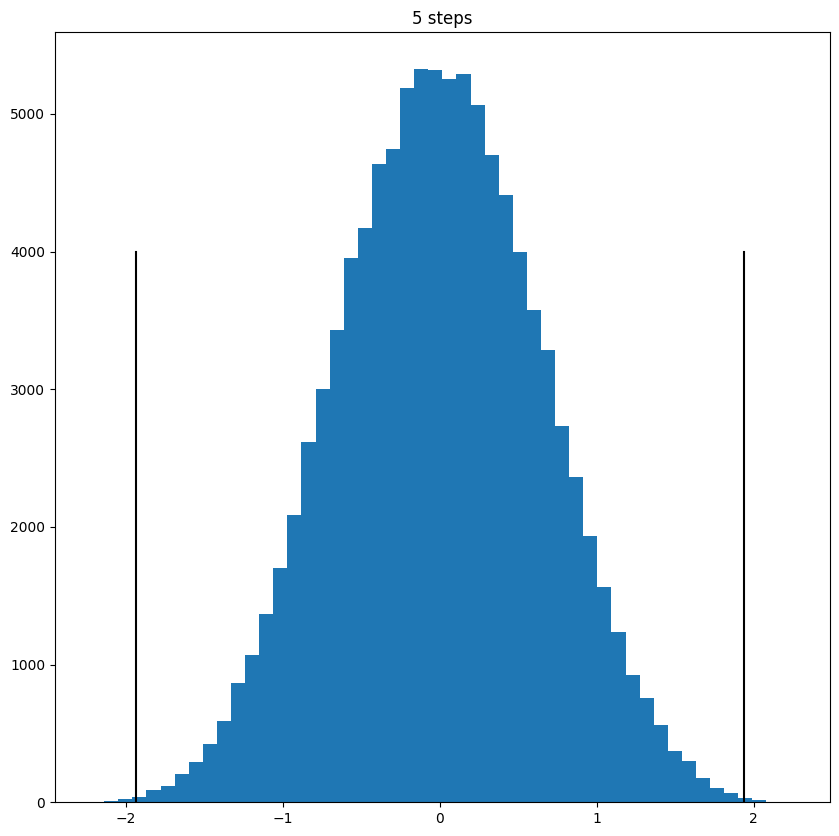

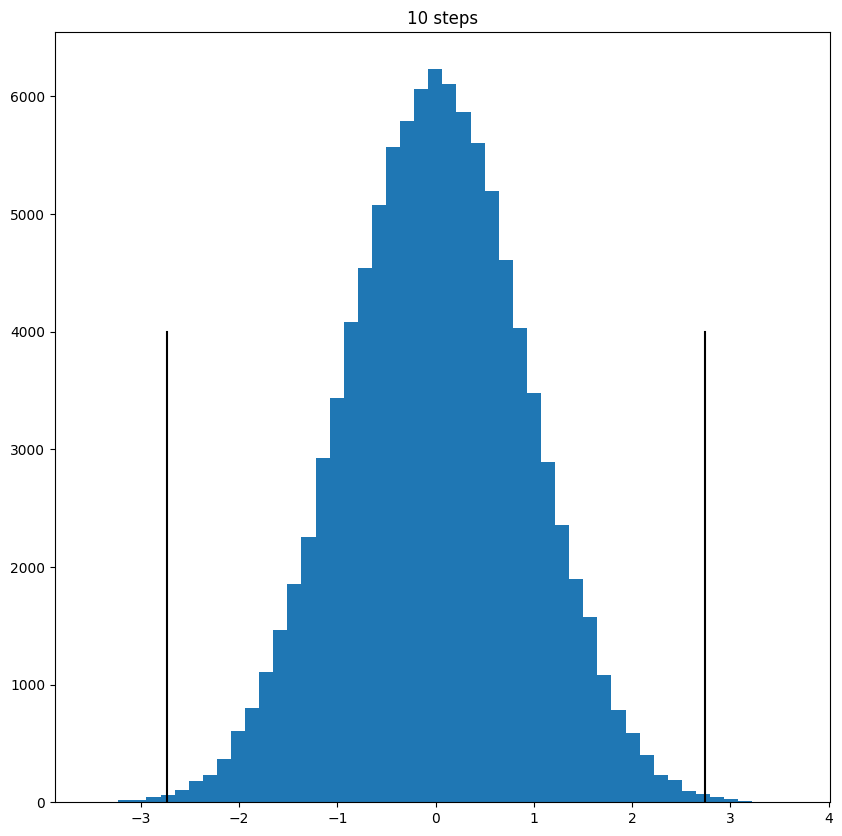

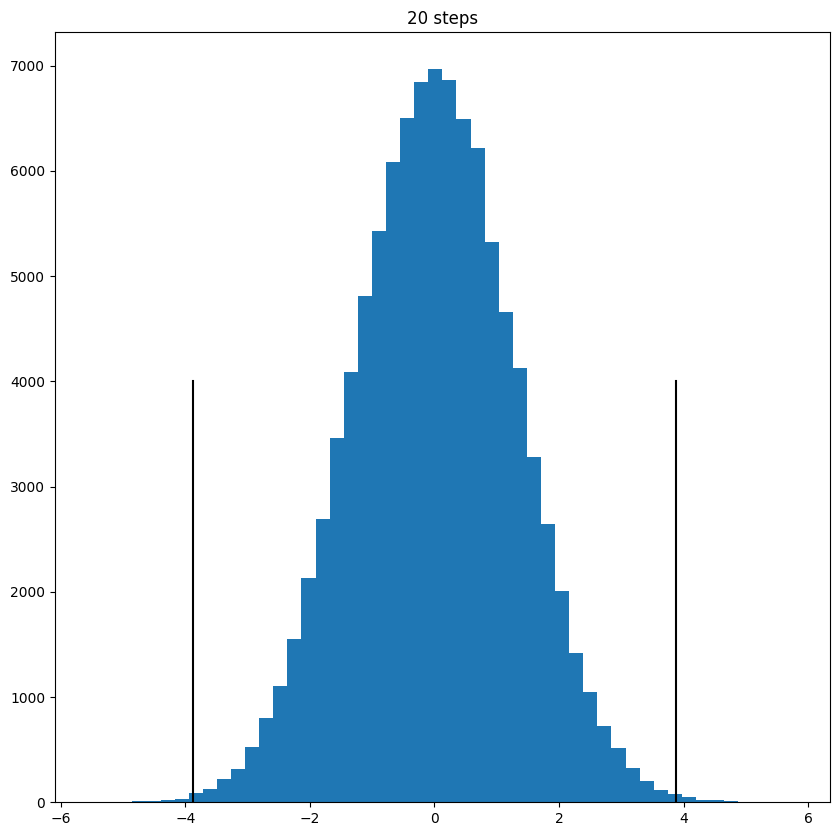

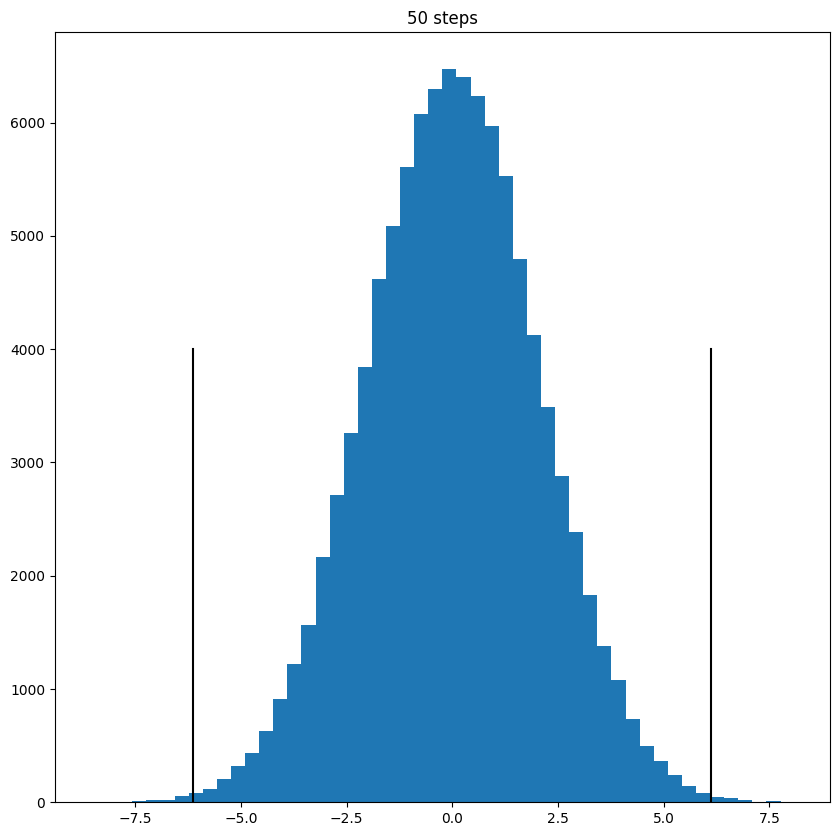

In [12]:
for i in [1,2,3,4,5,10,20,50]:
  plot_statistic(10**5, i)

As we increase the number of steps, we see the distance from the center quickly acquires the well known bell shape of the gaussian distributions.